In [1]:
import numpy as np

## Fully-Connected Layer

### Initialize weights and bias

In [2]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

### Forward pass

In [3]:
z = W @ x + b
y_pred = 1 / (1 + np.exp(-z))

print("Output (y):\n", y_pred)

Output (y):
 [[0.73105858]]


### Calculate loss

In [4]:
# Mean squared error
loss = np.mean((y_true - y_pred) ** 2)

print("Loss (L):\n", loss)

Loss (L):
 0.07232948812851325


### Backward pass

In [5]:
dL_dy = - 2 * (y_true - y_pred)
dy_dz = y_pred * (1 - y_pred)  # sigmoid derivative
dL_dz = dL_dy * dy_dz
dL_dW = dL_dz @ x.T
dL_db = dL_dz
dL_dx = W.T @ dL_dz

print("Gradient wrt weights (dL/dW):\n", dL_dW)
print("\nGradient wrt bias (dL/db):\n", dL_db)
print("\nGradient wrt input (dL/dx):\n", dL_dx)

Gradient wrt weights (dL/dW):
 [[-0.10575419 -0.21150837]]

Gradient wrt bias (dL/db):
 [[-0.10575419]]

Gradient wrt input (dL/dx):
 [[-0.01057542]
 [-0.02115084]]


### Update the weights and bias using the gradient

In [6]:
lr = 0.01
W -= lr * dL_dW
b -= lr * dL_db

print("Updated weights (W):\n", W)
print("Updated bias (b):\n", b)

Updated weights (W):
 [[0.10105754 0.20211508]]
Updated bias (b):
 [[0.50105754]]


### Training loop

In [7]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

lr = 0.01

# Training loop
for epoch in range(5):
    # Forward pass
    z = x @ W + b
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid activation function
    
    # Loss (mean-squared error)
    loss = np.mean((y_true - y_pred) ** 2)

    # Backward pass
    dL_dy = - 2 * (y_true - y_pred)  # Mean-squared error derivation
    dy_dz = y_pred * (1 - y_pred)  # Sigmoid derivation
    dL_dz = dL_dy * dy_dz

    dL_dW = x.T @ dL_dz
    dL_db = np.sum(dL_dz)

    # Update step
    W -= lr * dL_dW
    b -= lr * dL_db
    
    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")
    print("Updated W:", W, " Updated b:", b)

Epoch 1, Loss = 0.1073
Updated W: [[0.10456405 0.20384734]]  Updated b: [[0.50575205]]
Epoch 2, Loss = 0.1056
Updated W: [[0.10906857 0.20764446]]  Updated b: [[0.51143431]]
Epoch 3, Loss = 0.1040
Updated W: [[0.11351457 0.21139234]]  Updated b: [[0.51704801]]
Epoch 4, Loss = 0.1023
Updated W: [[0.11790308 0.21509192]]  Updated b: [[0.52259436]]
Epoch 5, Loss = 0.1007
Updated W: [[0.12223509 0.21874413]]  Updated b: [[0.52807453]]


## Fully-Connected Network (FCN)

### Example: FCN for point classification

In [8]:
# pip install nnfs
import nnfs
from nnfs.datasets import spiral_data

# pip install matplotlib
import matplotlib.pyplot as plt

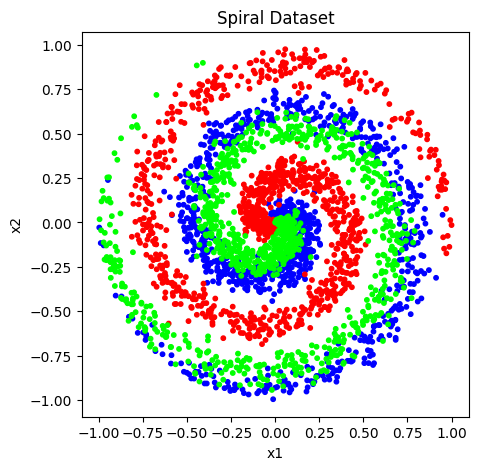

In [9]:
x_train, y_train = spiral_data(samples=1000, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [10]:
# pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
# Convert data to tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

In [12]:
# FCN model (3 hidden layers)
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=3),
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the weights and biases
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")

Epoch 1, Loss = 1.1101
Epoch 2, Loss = 1.1023
Epoch 3, Loss = 1.0755
Epoch 4, Loss = 1.0859
Epoch 5, Loss = 1.0726
Epoch 6, Loss = 1.0670
Epoch 7, Loss = 1.0662
Epoch 8, Loss = 1.0642
Epoch 9, Loss = 1.0583
Epoch 10, Loss = 1.0522
Epoch 11, Loss = 1.0470
Epoch 12, Loss = 1.0433
Epoch 13, Loss = 1.0390
Epoch 14, Loss = 1.0327
Epoch 15, Loss = 1.0264
Epoch 16, Loss = 1.0201
Epoch 17, Loss = 1.0136
Epoch 18, Loss = 1.0061
Epoch 19, Loss = 0.9978
Epoch 20, Loss = 0.9900
Epoch 21, Loss = 0.9826
Epoch 22, Loss = 0.9748
Epoch 23, Loss = 0.9671
Epoch 24, Loss = 0.9592
Epoch 25, Loss = 0.9510
Epoch 26, Loss = 0.9432
Epoch 27, Loss = 0.9363
Epoch 28, Loss = 0.9302
Epoch 29, Loss = 0.9214
Epoch 30, Loss = 0.9097
Epoch 31, Loss = 0.9015
Epoch 32, Loss = 0.8950
Epoch 33, Loss = 0.8848
Epoch 34, Loss = 0.8716
Epoch 35, Loss = 0.8619
Epoch 36, Loss = 0.8545
Epoch 37, Loss = 0.8439
Epoch 38, Loss = 0.8304
Epoch 39, Loss = 0.8169
Epoch 40, Loss = 0.8062
Epoch 41, Loss = 0.7981
Epoch 42, Loss = 0.7898
E

### Test the model

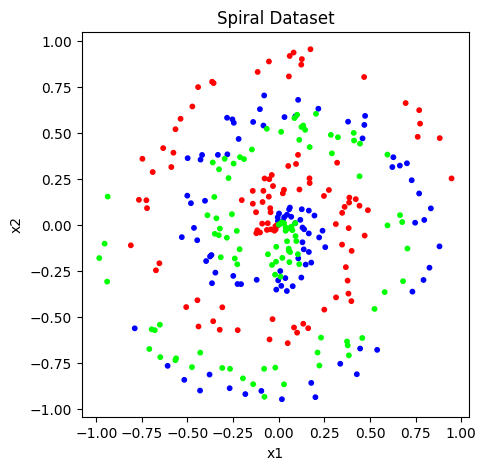

In [13]:
x_test, y_test = spiral_data(samples=100, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [14]:
# Convert data to tensors
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

with torch.no_grad():
    y_pred = model(x_test)
    pred_test = torch.argmax(y_pred, axis=1)
    test_acc = (pred_test == y_test).float().mean()

print(f"\nFinal Test Accuracy: {test_acc:.3f}")


Final Test Accuracy: 0.843


### Example: FCN for image classification

In [15]:
from torchvision import datasets, transforms

In [16]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [17]:
image, label = train_data[0]

print("Image shape:", image.shape)
print("Label:", label)


Image shape: torch.Size([1, 28, 28])
Label: 5


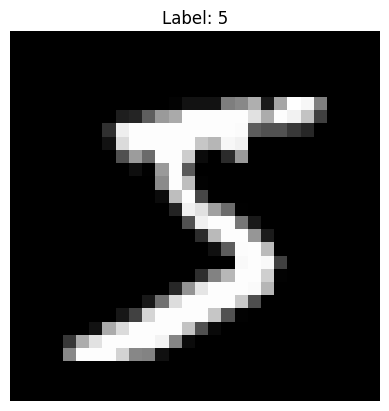

In [18]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)

        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss = {total_loss:.4f}")

Epoch 1, Loss = 16393.0596
Epoch 2, Loss = 10884.7761
Epoch 3, Loss = 9834.1604
Epoch 4, Loss = 9196.0441
Epoch 5, Loss = 8858.1126
Epoch 6, Loss = 8267.2513
Epoch 7, Loss = 7916.9781
Epoch 8, Loss = 7938.9500
Epoch 9, Loss = 8071.4328
Epoch 10, Loss = 6905.6258


## Convolutional Layer

### Initialize input, weights and bias

In [21]:
X = np.random.randint(0, 255, (28, 28))

W = np.array([
    [0.2, -0.5],
    [0.3, 0.1]
])
b = 0.0

### Forward pass

In [22]:
# Convolutional layer
kernel_size = 2
padding = 0
stride = 1

# Calculate the output size
H_out = (X.shape[0] + 2 * padding - kernel_size) // stride + 1
W_out = (X.shape[1] + 2 * padding - kernel_size) // stride + 1

# Do the convolution operation
Z = np.zeros((H_out, W_out))
for i in range(0, H_out, stride):
    for j in range(0, W_out, stride):
        conv_region = X[i:i+kernel_size, j:j+kernel_size]
        Z[i, j] = np.sum(W * conv_region) + b

print("Output (Z):\n", Z)
print("\nShape after convolutional layer:", Z.shape)

Output (Z):
 [[ 5.5500000e+01  3.5900000e+01  1.7600000e+01 -3.2600000e+01
   6.0600000e+01 -1.5400000e+01  3.4000000e+01 -2.8300000e+01
   5.0100000e+01 -1.2000000e+00  8.1000000e+00 -2.4100000e+01
  -9.0000000e-01  5.6600000e+01 -4.2500000e+01  7.6600000e+01
  -1.8800000e+01  5.9000000e+01 -3.0000000e+00  6.3000000e+00
   5.7400000e+01  2.5700000e+01 -2.0900000e+01 -5.1700000e+01
   3.8300000e+01  1.8800000e+01  2.7500000e+01]
 [ 5.5000000e+01 -7.5000000e+01  4.2900000e+01 -2.5600000e+01
   4.3700000e+01  7.0400000e+01 -4.9000000e+01  1.9700000e+01
   8.7300000e+01 -4.5600000e+01 -5.3900000e+01  1.6700000e+01
  -2.2600000e+01  3.3000000e+01 -9.3000000e+00 -8.1000000e+01
  -2.0000000e+01  1.7200000e+01  1.7300000e+01 -2.2900000e+01
   2.9700000e+01 -3.3800000e+01  5.7900000e+01 -6.1800000e+01
   9.5800000e+01  5.3100000e+01  6.0000000e-01]
 [ 3.2500000e+01  3.4900000e+01  7.7800000e+01  3.7100000e+01
  -4.4300000e+01 -2.7600000e+01  5.9200000e+01 -6.3100000e+01
   7.3800000e+01  1.011

In [23]:
# Activation function (ReLU)
A = np.maximum(0, Z)
print("Output after ReLU (Z):\n", A)
print("\nShape after ReLU:", A.shape)

Output after ReLU (Z):
 [[ 55.5  35.9  17.6   0.   60.6   0.   34.    0.   50.1   0.    8.1   0.
    0.   56.6   0.   76.6   0.   59.    0.    6.3  57.4  25.7   0.    0.
   38.3  18.8  27.5]
 [ 55.    0.   42.9   0.   43.7  70.4   0.   19.7  87.3   0.    0.   16.7
    0.   33.    0.    0.    0.   17.2  17.3   0.   29.7   0.   57.9   0.
   95.8  53.1   0.6]
 [ 32.5  34.9  77.8  37.1   0.    0.   59.2   0.   73.8 101.1  72.9   0.
   33.1   0.   99.5  34.8   0.   98.9   2.5  84.5  56.2   0.   35.1   0.
   62.8  13.2  93.6]
 [ 39.3   0.   72.6  29.2  79.6  65.8  27.5   0.    0.    0.    0.   50.
   12.8   0.   23.6   0.   13.7   0.    2.2   0.    0.   31.1  19.9   0.
   34.2   0.    0. ]
 [ 69.8   0.   40.8   0.    0.   11.6  67.7   0.    0.   32.6  27.5  18.4
    0.3   0.   11.4   0.   17.5   0.   56.1  37.    0.   33.4   0.   65.8
    0.   87.7   0. ]
 [  0.    0.    0.   80.    0.   49.8  52.9  44.4   0.    0.   46.8  40.6
   29.2  40.5  31.1  42.7  54.6   0.   73.6  45.9  28.7  46.3  1

In [24]:
# MaxPool 2x2 layer
pool_size = 2
pool_stride = 2

# Calculate the output size
H_out = (A.shape[0] - pool_size) // pool_stride + 1
W_out = (A.shape[1] - pool_size) // pool_stride + 1

# Do the pooling operation
P = np.zeros((H_out, W_out))
for i in range(0, H_out, pool_stride):
    for j in range(0, W_out, pool_stride):
        pool_region = A[i:i+pool_size, j:j+pool_size]
        P[i, j] = np.max(pool_region)
        
print("Output after max-pooling layer (P):\n", P)
print("\nShape after max-pooling layer:", P.shape)

Output after max-pooling layer (P):
 [[ 55.5   0.   42.9   0.   70.4   0.   34.    0.   87.3   0.   16.7   0.
   56.6]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 39.3   0.   77.8   0.   79.6   0.   59.2   0.  101.1   0.   72.9   0.
   33.1]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 69.8   0.   80.    0.   49.8   0.   67.7   0.   32.6   0.   46.8   0.
   40.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 87.2   0.   37.8   0.   61.5   0.   50.2   0.   48.6   0.   30.9   0.
   39.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 69.2   0.   93.6   0.   60.    0.   54.2   0.   72.6   0.   71.6   0.
   31.9]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [105.4   0.  120.1   0.   97.8   0.  121.9   0.  108.9   0.   92.9   0.
   55.4]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 

### Backward pass?

In [25]:
# Write your code for convolutional layer's backward pass here

### CNN for image classification


In [26]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flattening
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss = {total_loss:.4f}")

Epoch 1, Loss = 6931.3123
Epoch 2, Loss = 3409.1153
Epoch 3, Loss = 2958.1330
Epoch 4, Loss = 2672.1357
Epoch 5, Loss = 2719.3486
Epoch 6, Loss = 2654.9147
Epoch 7, Loss = 2494.6995
Epoch 8, Loss = 2442.0844
Epoch 9, Loss = 2353.1452
Epoch 10, Loss = 2082.6967


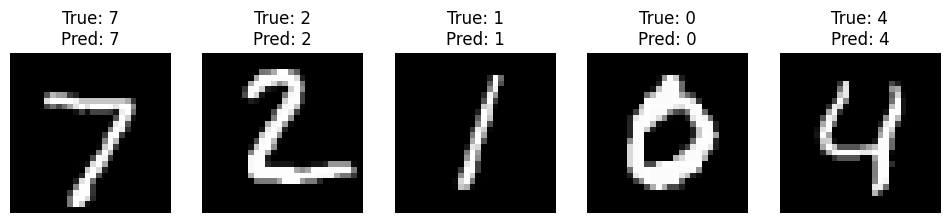

In [29]:
test_data = datasets.MNIST(root="./data", train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=5, shuffle=False)

model.eval()

# Get the first 5 test images and labels
images, labels = next(iter(test_loader))

images = images.to(device)
labels = labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
    plt.axis("off")

plt.show()